In [17]:
import pandas as pd
import sqlite3

In [18]:
conn = sqlite3.connect('database.sqlite')      # connect to database

In [19]:
# station ------------------

sta_sql = "select * from station;"

In [20]:
df_sta = pd.read_sql(sta_sql,conn)             # load dataframe 

In [21]:
df_sta.head(10)

,id,name,lat,long,dock_count,city,installation_date
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013
5,7,Paseo de San Antonio,37.333798,-121.886943,15,San Jose,8/7/2013
6,8,San Salvador at 1st,37.330165,-121.885831,15,San Jose,8/5/2013
7,9,Japantown,37.348742,-121.894715,15,San Jose,8/5/2013
8,10,San Jose City Hall,37.337391,-121.886995,15,San Jose,8/6/2013
9,11,MLK Library,37.335885,-121.885660,19,San Jose,8/6/2013


In [22]:
df_sta.shape

(70, 7)

In [72]:
# docks by city

df_sta.groupby('city').dock_count.sum().sort_values(ascending=False)

city
San Francisco    665
San Jose         264
Mountain View    117
Redwood City     115
Palo Alto         75
Name: dock_count, dtype: int64

In [29]:
# trip ------------------

## sqlite> select count(id) from trip;
## 669,959

trip_sql = 'select * from trip;'

df_trip = pd.read_sql(trip_sql,conn)             # load dataframe 

df_trip.head(10)

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4069,174,8/29/2013 9:08,2nd at South Park,64,8/29/2013 9:11,2nd at South Park,64,288,Subscriber,94114
1,4073,1067,8/29/2013 9:24,South Van Ness at Market,66,8/29/2013 9:42,San Francisco Caltrain 2 (330 Townsend),69,321,Subscriber,94703
2,4074,1131,8/29/2013 9:24,South Van Ness at Market,66,8/29/2013 9:43,San Francisco Caltrain 2 (330 Townsend),69,317,Subscriber,94115
3,4075,1117,8/29/2013 9:24,South Van Ness at Market,66,8/29/2013 9:43,San Francisco Caltrain 2 (330 Townsend),69,316,Subscriber,94122
4,4076,1118,8/29/2013 9:25,South Van Ness at Market,66,8/29/2013 9:43,San Francisco Caltrain 2 (330 Townsend),69,322,Subscriber,94597
5,4078,3829,8/29/2013 9:31,Redwood City Caltrain Station,22,8/29/2013 10:34,Redwood City Caltrain Station,22,228,Customer,94062
6,4079,995,8/29/2013 9:35,South Van Ness at Market,66,8/29/2013 9:52,South Van Ness at Market,66,327,Subscriber,94102
7,4080,764,8/29/2013 9:36,South Van Ness at Market,66,8/29/2013 9:49,San Francisco Caltrain 2 (330 Townsend),69,315,Subscriber,94117
8,4081,218,8/29/2013 9:38,Mountain View City Hall,27,8/29/2013 9:41,Mountain View City Hall,27,150,Subscriber,97214
9,4084,287,8/29/2013 9:41,Mountain View City Hall,27,8/29/2013 9:46,Mountain View City Hall,27,138,Customer,97214


In [73]:
# trip counts ------ 
# busiest starting stations

df_trip.groupby(['start_station_id','start_station_name']).id.count().sort_values(ascending=False).head(10)

start_station_id  start_station_name                           
70                San Francisco Caltrain (Townsend at 4th)         49092
69                San Francisco Caltrain 2 (330 Townsend)          33742
50                Harry Bridges Plaza (Ferry Building)             32934
60                Embarcadero at Sansome                           27713
55                Temporary Transbay Terminal (Howard at Beale)    26089
61                2nd at Townsend                                  25837
74                Steuart at Market                                24838
77                Market at Sansome                                24172
65                Townsend at 7th                                  23724
67                Market at 10th                                   20272
Name: id, dtype: int64

In [92]:
# trip count by most popular *customer* starting stations

df_trip.pivot_table('id', index='start_station_name',columns='subscription_type', aggfunc='count').sort_values('Customer', ascending=False).head(10)

# vs filtering for customers / non-subscribers first:
# df_trip[df_trip.subscription_type=='Customer'].groupby(['start_station_id','start_station_name']).id.count().sort_values(ascending=False).head(10)

subscription_type,Customer,Subscriber
start_station_name,,
Embarcadero at Sansome,10445,17268
Harry Bridges Plaza (Ferry Building),9432,23502
Market at 4th,4521,15644
Powell Street BART,3932,14446
Embarcadero at Vallejo,3810,6782
Powell at Post (Union Square),3758,8738
Steuart at Market,3373,21465
2nd at Townsend,3355,22482
San Francisco Caltrain (Townsend at 4th),3250,45842


In [93]:
# trip count by most popular *subscriber* starting stations

df_trip.pivot_table('id', index='start_station_name',columns='subscription_type', aggfunc='count').sort_values('Subscriber', ascending=False).head(10)

# vs filtering for 'Subscriber' first:
# df_trip[df_trip.subscription_type=='Subscriber'].groupby(['start_station_id','start_station_name']).id.count().sort_values(ascending=False).head(10)

subscription_type,Customer,Subscriber
start_station_name,,
San Francisco Caltrain (Townsend at 4th),3250,45842
San Francisco Caltrain 2 (330 Townsend),1780,31962
Temporary Transbay Terminal (Howard at Beale),1039,25050
Harry Bridges Plaza (Ferry Building),9432,23502
2nd at Townsend,3355,22482
Townsend at 7th,1606,22118
Steuart at Market,3373,21465
Market at Sansome,2959,21213
Market at 10th,2724,17548


In [148]:
# graphs of trip counts ---

# start_station_id = shorter
# subs_1 = df_trip[df_trip.subscription_type=='Subscriber'].groupby(['start_station_id']).id.count().sort_values(ascending=False).head(10)
# subs_1


In [144]:
# subs_1.plot()

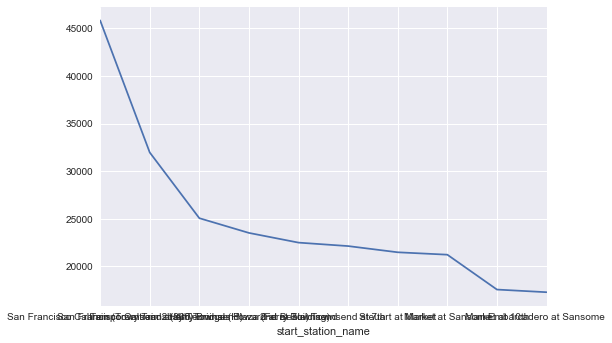

In [154]:
subs_2 = df_trip[df_trip.subscription_type=='Subscriber'].groupby(['start_station_name']).id.count().sort_values(ascending=False).head(10)
subs_2.plot() # same result as: subs_2.plot(x=subs_2.index,y=subs_2)

In [110]:
# seaborn ---

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True)

In [114]:
# first pass at trip graphs

subs = df_trip[df_trip.subscription_type=='Subscriber'].groupby(['start_station_name']).id.count().sort_values(ascending=False).head(10)
# df_trip[df_trip.subscription_type=='Customer'].groupby(['start_station_name']).id.count().sort_values(ascending=False).head(10)

subs

start_station_name
San Francisco Caltrain (Townsend at 4th)         45842
San Francisco Caltrain 2 (330 Townsend)          31962
Temporary Transbay Terminal (Howard at Beale)    25050
Harry Bridges Plaza (Ferry Building)             23502
2nd at Townsend                                  22482
Townsend at 7th                                  22118
Steuart at Market                                21465
Market at Sansome                                21213
Market at 10th                                   17548
Embarcadero at Sansome                           17268
Name: id, dtype: int64

In [163]:
# type(subs)
# pandas.core.series.Series
# subs.index

In [ ]:
sns.factorplot(x='start_station_name',y)

In [128]:
# sns.stripplot(x=subs,y=subs.index, data=subs)

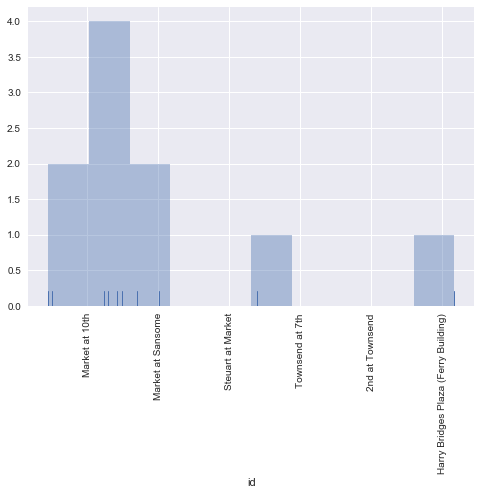

In [170]:
# subs ---
grph = sns.distplot(subs, kde=False, rug=True) #, axlabel=subs.index.all)

grph.set_xticklabels(labels = subs.index, rotation=90)

#g.set_xticklabels(rotation=30);


# df_trip ---
# sns.stripplot(x='start_station_name', y=id.count(), data=df_trip)

# sns.stripplot(x='start_station_name', groupby='start_station_name', data=df_trip)
              # y=df_trip.id.count,data=df_trip)
    
# sns.stripplot(groupby='start_station_name', data=df_trip)

# sns.kdeplot(subs)

In [100]:
# other trip info - what time does trip data cover?

df_trip.start_date.min()

'1/1/2014 0:14'

In [101]:
df_trip.start_date.max()

'9/9/2014 9:59'

In [98]:
# pivot duration by starting station & subscription type. need to validate. 
# does duration work the same way for both customer types? or tourists = much longer rides

df_trip.pivot_table('duration',index='start_station_name',columns='subscription_type').sort_values(by='Customer', ascending=False).head(10)

subscription_type,Customer,Subscriber
start_station_name,,
Redwood City Medical Center,25585.294118,1305.061372
South Van Ness at Market,14390.366479,702.283042
Redwood City Public Library,12736.971831,500.366197
Rengstorff Avenue / California Street,12497.662722,617.356511
Redwood City Caltrain Station,12251.984314,484.810624
San Mateo County Center,11665.780000,828.793249
San Antonio Caltrain Station,10902.273458,411.052566
University and Emerson,9198.967169,917.418182
Castro Street and El Camino Real,9140.280488,471.005272


In [ ]:
# status -------------------

## sqlite> select count(*) from status;
## 71,984,434
##
## table|status|status|3|CREATE TABLE status (
##    station_id INTEGER,
##    bikes_available INTEGER,
##    docks_available INTEGER,
##    time TEXT)
##
## sqlite> select max(time) from status;
## 2015-08-31 23:59:02
##
## sqlite> select min(time) from status;
##
##
## runs longer than trips, which covers '1/1/2014 0:14' through '9/9/2014 9:59'

# status_sql = "select * from status;"

# df_status = pd.read_sql(status_sql,conn)             # load dataframe 

# df_status.head(10)

In [ ]:
# df_status.columns

In [ ]:
# weather ------------------

# sqlite> select count(*) from weather;
# 3665

weather_sql = 'select * from weather;'

df_weather = pd.read_sql(weather_sql,conn)             # load dataframe 

df_weather.columns

In [ ]:
# merge weather & trips ----


In [ ]:
# merge trips & station ----


In [ ]:
# next ---------------------


### Notes -------------

In [ ]:
# short trip counts ------
# skip loading full table to save time while in exploratory phase

## sqlite> select max(start_date) from trip;
## 9/9/2014 9:59
##
## sqlite> select count(*) from trip where start_date > '9/9/2014 8:00';
## 330

# sm_trip_sql = "select * from trip where start_date > '9/9/2014 8:00';"

# df_sm_trip = pd.read_sql(sm_trip_sql, conn)

# df_sm_trip.head(10)

# df_sm_trip.shape # (330, 11)

# df_sm_trip.groupby('start_station_name').id.count().sort_values(ascending=False).head(10)